In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('EVChargingStationUsage.csv')
df.head()

C:\Users\Vandan\AppData\Local\Temp\ipykernel_30740\143297901.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [6]:
df['Plug In Event Id'].value_counts()

Plug In Event Id
657           257
100            52
345            51
152            51
406            51
             ... 
1416104684      1
1494049703      1
1494049149      1
1494048796      1
1609436248      1
Name: count, Length: 36838, dtype: int64

In [7]:
df.drop(columns=['Org Name', 'Transaction Date (Pacific Time)', 'City', 'State/Province', 'Country', 'Ended By', 'Plug In Event Id', 'County', 'Driver Postal Code', 'System S/N'], inplace=True)

In [8]:
df.shape

(259415, 23)

In [9]:
df['Model Number'].fillna(0, inplace=True)
df['EVSE ID'].fillna(0, inplace=True)

In [10]:
df.dropna()

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),...,Plug Type,EVSE ID,Address 1,Postal Code,Latitude,Longitude,Currency,Fee,User ID,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,3:03:32,1:54:03,6.249457,2.625,...,J1772,0.0,250 Hamilton Ave,94301,37.444572,-122.160309,USD,0.00,3284.0,0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,0:02:06,0:01:54,0.106588,0.045,...,J1772,0.0,250 Hamilton Ave,94301,37.444572,-122.160309,USD,0.00,4169.0,0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,4:17:32,4:17:28,14.951777,6.280,...,J1772,0.0,250 Hamilton Ave,94301,37.444572,-122.160309,USD,0.00,4169.0,0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,2:03:24,2:02:58,7.159643,3.007,...,J1772,0.0,250 Hamilton Ave,94301,37.444572,-122.160309,USD,0.00,2545.0,0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,1:11:24,0:43:54,1.957765,0.822,...,J1772,0.0,250 Hamilton Ave,94301,37.444572,-122.160309,USD,0.00,3765.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,0:35:44,0:35:18,1.841000,0.773,...,J1772,344261.0,275 Cambridge Ave,94306,37.428623,-122.144043,USD,0.42,2024201,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,3:43:01,2:14:04,12.744000,5.352,...,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,USD,4.69,242661,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,17:28:14,5:08:12,29.665000,12.459,...,J1772,2884001.0,3700 Middlefield Rd,94303,37.422104,-122.113510,USD,6.82,449995,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,4:05:34,3:53:42,11.976000,5.030,...,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,USD,2.75,804075,CT4020-HD-GW


In [11]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Total Duration (hh:mm:ss)'], inplace=True)

In [12]:
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Charging Time (hh:mm:ss)'], inplace=True)

In [13]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['Start Time'] = df['Start Date'].dt.strftime('%H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M',errors='coerce')
df['End Time'] = df['End Date'].dt.strftime('%H:%M')

## 2. EDA 

### Number of Stations at a unique Address

In [14]:
dist = df.groupby("Address 1")["Station Name"].nunique().reset_index()
dist.rename(columns={"Station Name": "Number of Stations"}, inplace=True)
dist

,Address 1,Number of Stations
0,1213 Newell Rd,3
1,1514 Walnut Dr,1
2,1520 Walnut Dr,2
3,250 Hamilton Ave,2
4,275 Cambridge Ave,4
5,350 Sherman Ave,11
6,358 Sherman Ave,2
7,3700 Middlefield Rd,6
8,400 Cambridge Ave,2
9,445 Bryant St,7


### Distribution of Stations

In [15]:
station_name_dist = df["Station Name"].value_counts()
station_name_dist

Station Name
PALO ALTO CA / HAMILTON #2        23721
PALO ALTO CA / HAMILTON #1        14888
PALO ALTO CA / WEBSTER #1         14432
PALO ALTO CA / BRYANT #2          14389
PALO ALTO CA / HIGH #4            13898
PALO ALTO CA / BRYANT #1          13436
PALO ALTO CA / WEBSTER #2         12669
PALO ALTO CA / CAMBRIDGE #1       11163
PALO ALTO CA / HIGH #1            10756
PALO ALTO CA / WEBSTER #3         10484
PALO ALTO CA / TED THOMPSON #1     9814
PALO ALTO CA / CAMBRIDGE #2        9256
PALO ALTO CA / MPL #6              8996
PALO ALTO CA / HIGH #3             8317
PALO ALTO CA / MPL #4              7787
PALO ALTO CA / MPL #5              7544
PALO ALTO CA / HIGH #2             6930
PALO ALTO CA / RINCONADA LIB 3     6499
PALO ALTO CA / RINCONADA LIB 1     6212
PALO ALTO CA / BRYANT #6           5857
PALO ALTO CA / RINCONADA LIB 2     5553
PALO ALTO CA / BRYANT #5           5332
PALO ALTO CA / CAMBRIDGE #5        4556
PALO ALTO CA / CAMBRIDGE #3        4476
PALO ALTO CA / BRYANT #3   

In [16]:
df.isnull().sum()

Station Name                     0
MAC Address                      0
Start Date                       0
Start Time Zone                  0
End Date                        40
End Time Zone                    0
Energy (kWh)                     0
GHG Savings (kg)                 0
Gasoline Savings (gallons)       0
Port Type                        9
Port Number                      0
Plug Type                        0
EVSE ID                          0
Address 1                        0
Postal Code                      0
Latitude                         0
Longitude                        0
Currency                      1788
Fee                              0
User ID                       7677
Model Number                     0
Total Duration (seconds)         0
Charging Time (seconds)          0
Start Time                       0
End Time                        40
dtype: int64

##### Boxplot

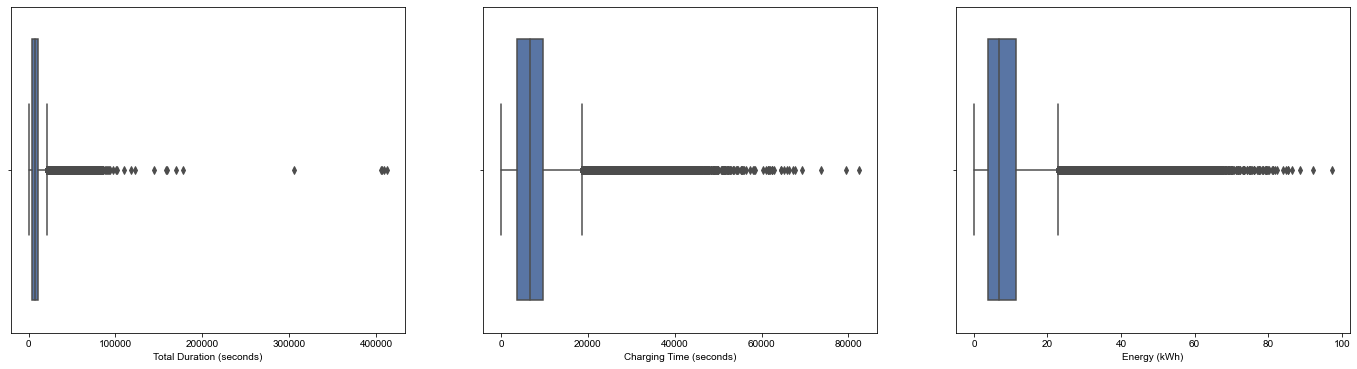

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total Duration (seconds)", "Charging Time (seconds)", "Energy (kWh)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

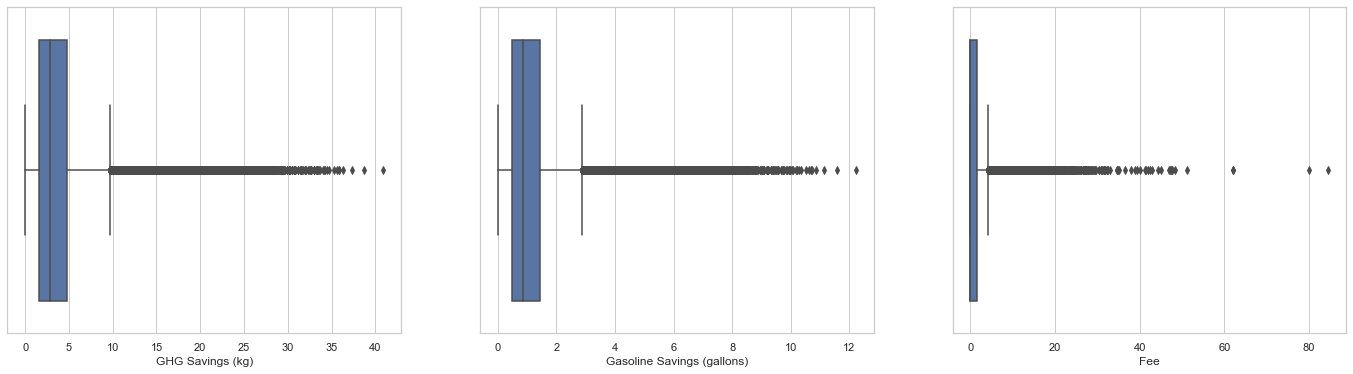

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["GHG Savings (kg)", "Gasoline Savings (gallons)", "Fee"]):
    sns.boxplot(x=df[col], ax=ax[axid])

### Pie charts

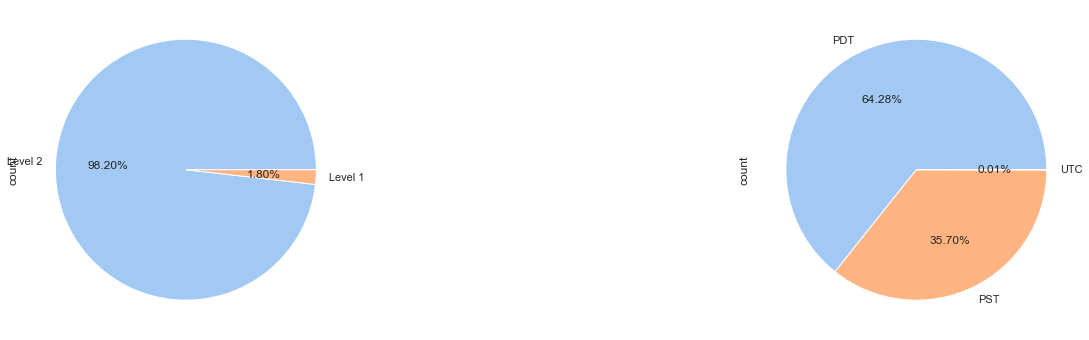

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["Port Type","Start Time Zone"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

### Count plot

<AxesSubplot: xlabel='Fees', ylabel='count'>

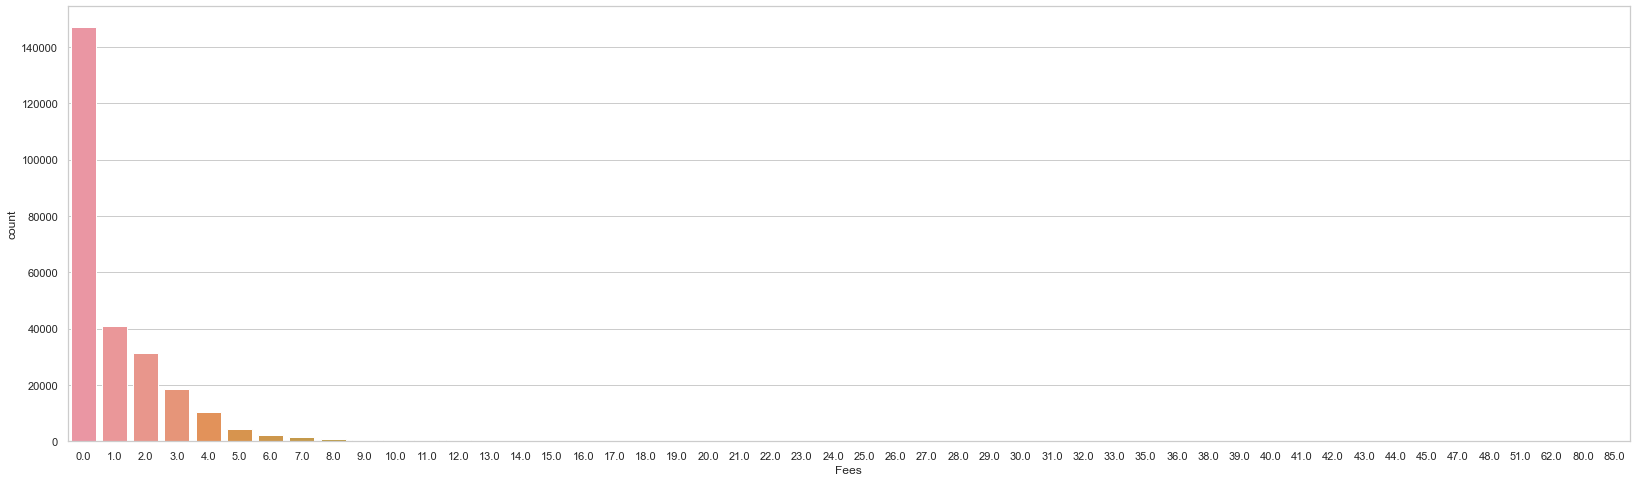

In [29]:
df["Fees"]=df["Fee"].round()
plt.figure(figsize=(28, 8))
sns.countplot(x="Fees",data=df)

<AxesSubplot: xlabel='Plug Type', ylabel='count'>

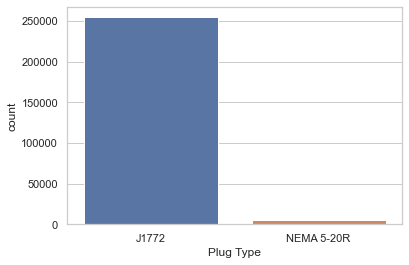

In [30]:
sns.countplot(x="Plug Type",data=df)